In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [2]:
## Create data to view and fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [4]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [5]:
# Split the data into train and test sets

X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [23]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

### SETTING UP TF MODELLING EXPERIMENTS

#### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for you model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [9]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 23.2536 - mae: 23.2536
Epoch 2/100
2/2 [==============================] - 0s 0s/step - loss: 10.8452 - mae: 10.8452
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 16.3575 - mae: 16.3575
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 8.7259 - mae: 8.7259
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 10.8001 - mae: 10.8001
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 9.9872 - mae: 9.9872
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 9.0363 - mae: 9.0363
Epoch 8/100
2/2 [==============================] - 0s 0s/step - loss: 9.0862 - mae: 9.0862
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 19.9127 - mae: 19.9127
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 10.7621 - mae: 10.7621
Epoch 11/100
2/2 [==============================] - 0s 0s/step - 

2/2 [==============================] - 0s 0s/step - loss: 11.9508 - mae: 11.9508
Epoch 88/100
2/2 [==============================] - 0s 16ms/step - loss: 10.5641 - mae: 10.5641
Epoch 89/100
2/2 [==============================] - 0s 12ms/step - loss: 7.2415 - mae: 7.2415
Epoch 90/100
2/2 [==============================] - 0s 0s/step - loss: 12.6973 - mae: 12.6973
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 7.3043 - mae: 7.3043
Epoch 92/100
2/2 [==============================] - 0s 16ms/step - loss: 7.6680 - mae: 7.6680
Epoch 93/100
2/2 [==============================] - 0s 0s/step - loss: 7.1060 - mae: 7.1060
Epoch 94/100
2/2 [==============================] - 0s 16ms/step - loss: 12.5437 - mae: 12.5437
Epoch 95/100
2/2 [==============================] - 0s 16ms/step - loss: 9.9176 - mae: 9.9176
Epoch 96/100
2/2 [==============================] - 0s 0s/step - loss: 9.1247 - mae: 9.1247
Epoch 97/100
2/2 [==============================] - 0s 16ms/step - loss: 

In [14]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 173ms/step


In [18]:
# Let's create a plotting function

def plot_predictions(train_data = X_train, train_labels = y_train,
                    test_data = X_test, test_labels = y_test,
                    predictions = y_preds_1):
    """
    Plots training datam test data and compares predictions to ground truth labels.
    """
    
    plt.figure(figsize = (10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = "b", label = "Training data")
    
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
    
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    
    #show the legend
    plt.legend();

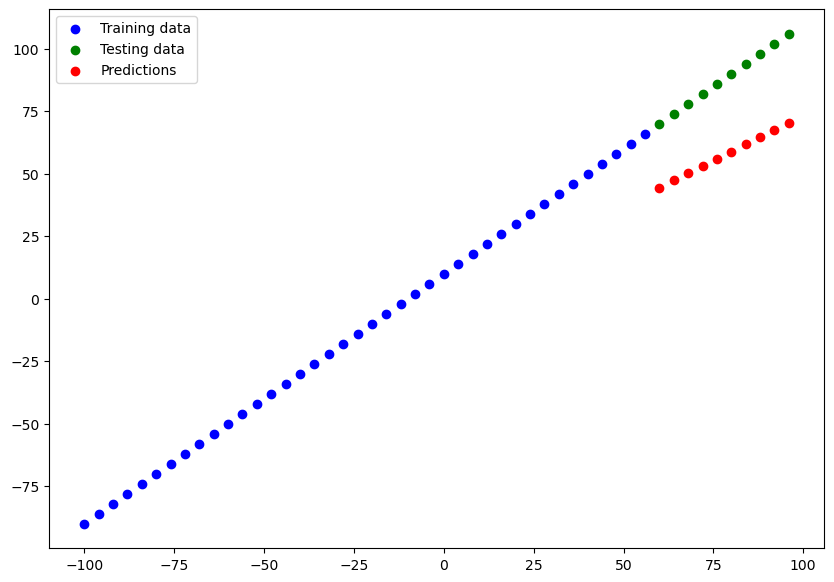

In [19]:
plot_predictions(predictions = y_preds_1)

In [22]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[44.461887],
        [47.338306],
        [50.214725],
        [53.09114 ],
        [55.96756 ],
        [58.843975],
        [61.720394],
        [64.59682 ],
        [67.473236],
        [70.349655]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44.461887, 47.338306, 50.214725, 53.09114 , 55.96756 , 58.843975,
        61.720394, 64.59682 , 67.473236, 70.349655], dtype=float32)>)

In [24]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.594233>,
 <tf.Tensor: shape=(), dtype=float32, numpy=946.42206>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs